# Лабораторная работа 1. Инструментальные средства машинного обучения

## <a href="https://archive.ics.uci.edu/dataset/29/computer+hardware">Компьютерные комплектующие</a>

### Описание набора данных:
Данный набор данных содержит информацию о производительности процессора, описанную в терминах времени его работы, времени машинного цикла и т.д.

### Информация о наборе данных:
Предполагаемые относительные значения производительности были рассчитаны авторами с использованием метода линейной регрессии. Более подробную информацию о том, как были установлены относительные значения производительности, смотрите в их статье (стр. 308-313).

### Назначение набора данных и возможные модели:
1) VendorName -	<b>Категоральное</b> - наименование проивзодителя
2) ModelName - <b>Категоральное</b> - множество уникальных символов
3) MYCT - <b>Целое</b> - время машинного цикла наносекунды
4) MMIN - <b>Целое</b> - минимальное количество килобайт оперативной памяти
5) MMAX - <b>Целое</b> - максимальное количество килобайт оперативной памяти
6) CACH - <b>Целое</b> - количество килобайт кэш-памяти
7) CHMIN - <b>Целое</b> - минимальное количество каналов в единицах
8) CHMAX - <b>Целое</b> - максимальное количество каналов в единицах
9) PRP - <b>Целое</b> - опубликованная относительная производительность
10) ERP - <b>Целое</b> - оцененная относительная производительность по оригинальной статье

Подключение библиотек и загрузка данных

In [13]:
import numpy as np
data3 = np.genfromtxt("machine.data", delimiter=",")

import matplotlib.pyplot as plt

Пример чтения данных из полученного dataset:

In [14]:
MYCT = []
MMAX = []
CACH = []
PRP = []
ERP = []
for dot in data3:
    MYCT.append(dot[2])
    MMAX.append(dot[4])
    CACH.append(dot[5])
    PRP.append(dot[8])
    ERP.append(dot[9])

## Построение графиков с использованием Matplotlib:

## Анализ взаимосвязи объема кэш-памяти и максимального объема ОЗУ по данным Графика 1

График 1 отображает распределение производителей процессоров в зависимости от поддерживаемого их продукцией минимального и максимального объема оперативной памяти (ОЗУ). 

**Наблюдения:**

* **Преобладание моделей с поддержкой до 8 МБ ОЗУ:**  Большинство производителей фокусируются на выпуске процессоров, поддерживающих до 8 МБ оперативной памяти. 
* **Использование ОЗУ в качестве замены кэш-памяти:**  Наличие моделей с минимальным объемом ОЗУ или вовсе без нее  указывает на возможное использование части оперативной памяти в качестве замены кэш-памяти процессора.

Text(0, 0.5, 'maximum main memory, KB')

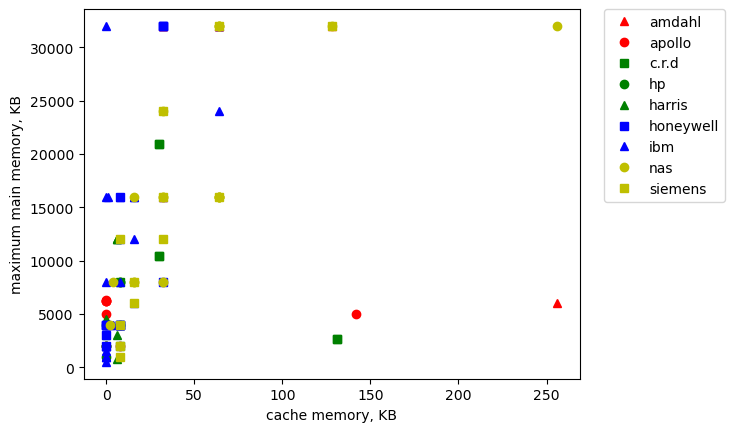

In [21]:
plt.figure(1)

amdahl = plt.plot(CACH[0:10], MMAX[0:10], 'r^', label='amdahl')
burroughs = plt.plot(CACH[16:24], MMAX[16:24], 'ro', label='apollo')
cdc = plt.plot(CACH[30:39], MMAX[30:39], 'gs', label='c.r.d')
hp = plt.plot(CACH[66:73], MMAX[66:73], 'go', label='hp')
harris = plt.plot(CACH[73:80], MMAX[73:80], 'g^', label='harris')
honeywell = plt.plot(CACH[80:93], MMAX[80:93], 'bs', label='honeywell')
ibm = plt.plot(CACH[93:125], MMAX[93:125], 'b^', label='ibm')
nas = plt.plot(CACH[138:157], MMAX[138:157], 'yo', label='nas')
siemens = plt.plot(CACH[181:193], MMAX[181:193], 'ys', label='siemens')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.xlabel('Cache memory, KB')
plt.ylabel('Maximum main memory, KB')

## Анализ корреляции между объемом кэш-памяти и длительностью машинного цикла на основе данных Графика 2

График 2 демонстрирует зависимость длительности одного машинного цикла процессора от объема его кэш-памяти. 

**Важно отметить:** Машинный цикл – это временной интервал, необходимый процессору для выполнения одной элементарной операции на машинном языке.

**Выводы:**

* **Отсутствие явной корреляции:** Исходя из представленных данных, нельзя утверждать о наличии прямой зависимости между объемом кэш-памяти процессора и длительностью его машинного цикла. 

Text(0, 0.5, 'CPU cycle, nanoseconds')

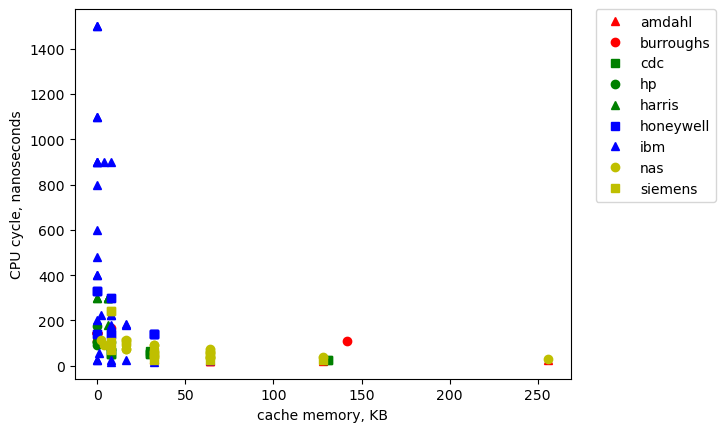

In [24]:
plt.figure(2)
amdahl, = plt.plot(CACH[0:10], MYCT[0:10], 'r^', label='amdahl')
burroughs, = plt.plot(CACH[16:24], MYCT[16:24], 'ro', label='burroughs')
cdc, = plt.plot(CACH[30:39], MYCT[30:39], 'gs', label='cdc')
hp, = plt.plot(CACH[66:73], MYCT[66:73], 'go', label='hp')
harris, = plt.plot(CACH[73:80], MYCT[73:80], 'g^', label='harris')
honeywell, = plt.plot(CACH[80:93], MYCT[80:93], 'bs', label='honeywell')
ibm, = plt.plot(CACH[93:125], MYCT[93:125], 'b^', label='ibm')
nas, = plt.plot(CACH[138:157], MYCT[138:157], 'yo', label='nas')
siemens = plt.plot(CACH[181:193], MYCT[181:193], 'ys', label='siemens')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('cache memory, KB')
plt.ylabel('CPU cycle, nanoseconds')

## Сравнительный анализ оценочной и опубликованной относительной производительности процессоров (График 3)

<p>График 3 представляет собой диаграмму рассеяния, где каждая точка отображает пару значений: оценочную и опубликованную относительную производительность процессора для определенного производителя.</p>

**Ключевое наблюдение:**

**Неполное соответствие оценочных и опубликованных значений:** 
<p>Распределение точек на графике свидетельствует о не всегда идеальном совпадении между оценочными и опубликованными данными о производительности. Это расхождение представляет интерес для дальнейшего анализа.</p>

**Потенциальные причины расхождений:**

**Различия в методиках измерения:** 
<p>Оценка производительности может производиться с использованием различных бенчмарков, тестовых систем и параметров, нежели те, что применяются производителями при публикации официальных данных.</p>

**Оптимизации под конкретные сценарии:**
<p>Производители могут оптимизировать свои продукты под  выполнение определенных задач или работу с конкретным программным обеспечением, что может влиять на результаты измерений.</p>

Text(0, 0.5, 'published relative performance')

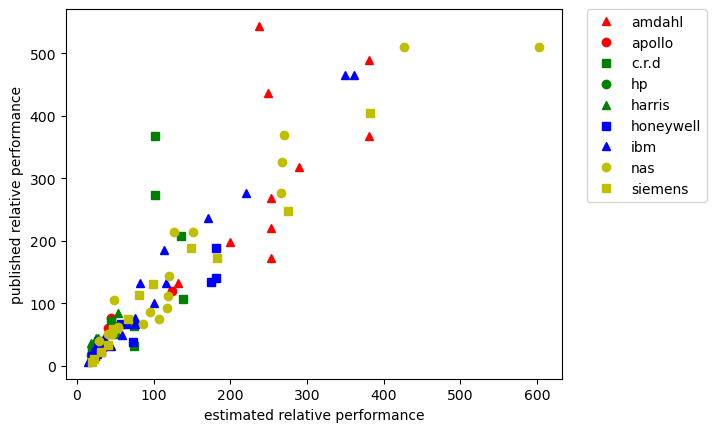

In [14]:
plt.figure(3)

amdahl = plt.plot(ERP[0:10], PRP[0:10], 'r^', label='amdahl')
burroughs = plt.plot(ERP[16:24], PRP[16:24], 'ro', label='apollo')
cdc = plt.plot(ERP[30:39], PRP[30:39], 'gs', label='c.r.d')
hp = plt.plot(ERP[66:73], PRP[66:73], 'go', label='hp')
harris = plt.plot(ERP[73:80], PRP[73:80], 'g^', label='harris')
honeywell = plt.plot(ERP[80:93], PRP[80:93], 'bs', label='honeywell')
ibm = plt.plot(ERP[93:125], PRP[93:125], 'b^', label='ibm')
nas = plt.plot(ERP[138:157], PRP[138:157], 'yo', label='nas')
siemens = plt.plot(ERP[181:193], PRP[181:193], 'ys', label='siemens')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.xlabel('Estimated relative performance')
plt.ylabel('Published relative performance')

<h3>Вывод:</h3>
<p>Проведенный анализ процессоров ЭВМ, основанный на представленных графиках, позволяет сделать предварительный вывод о том, что в рассматриваемый период времени наблюдалось сходство технических характеристик различных моделей. Отсутствие явных лидеров по объему кэш-памяти, корреляции между кэш-памятью и производительностью, а также расхождения между оценочной и заявленной производительностью может свидетельствовать о доминировании на рынке архитектурных решений, аналогичных IBM.</p>